<a href="https://colab.research.google.com/github/pravincoder/Tensorflow_models/blob/main/Loan_Approval_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction Model (Regression)
This is the link of the dataset :- [gdrive](https://drive.google.com/file/d/1LIvIdqdHDFEGnfzIgEh4L6GFirzsE3US/view?usp=sharing)

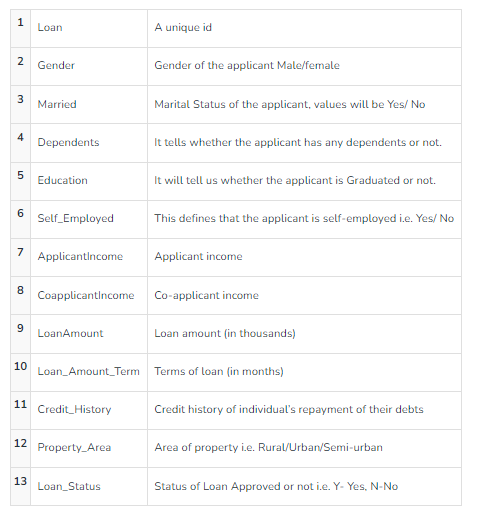

_Source GeeksforGeeks_   

## Importing the Modules & load the data


In [1]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.8 MB/

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss

In [3]:
# Load csv
data = pd.read_csv('/content/drive/MyDrive/LoanApprovalPrediction.csv')

## Data Cleaning

In [31]:
# Read the data
data.head(n=20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Replacing NaN(Null) Values

We are treating missing values in all features one by one.
We can consider these methods to fill the missing values:

*   For numerical variables: imputation using mean or median
*   For categorical variables: imputation using mode



In [32]:
# Get all the null values in the
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# Fill empty values of Dependant,Loan Amount,Loan_Amount_Term as it's numeric and float dtype
data['Dependents'].fillna(data['Dependents'].median(),inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [34]:


# Fill Empty Credit History with mode as its categorical
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

### Drop unwanted Columns

In [35]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [36]:

# Get data info
def table_info(data):
  print(f'Num Rows :- {data.shape[0]} , Num Colm :- {data.shape[1]}')
  print("\nTable DataTypes :\n",data.dtypes)
  print("\nColumn names :",data.columns.values)

In [37]:
table_info(data)

Num Rows :- 598 , Num Colm :- 12

Table DataTypes :
 Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Column names : ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [38]:

data['Dependents']=data['Dependents'].astype(int)

data['ApplicantIncome']=data['ApplicantIncome'].astype(int)

data['CoapplicantIncome']=data['CoapplicantIncome'].astype(int)

data['LoanAmount']=data['LoanAmount'].astype(int)

data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype(int)

data['Credit_History'] = data['Credit_History'].astype(int)
table_info(data)

Num Rows :- 598 , Num Colm :- 12

Table DataTypes :
 Gender               object
Married              object
Dependents            int64
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

Column names : ['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [39]:
# Check for no empty value in our table
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualication

### Categorical & Numerical data Visualization

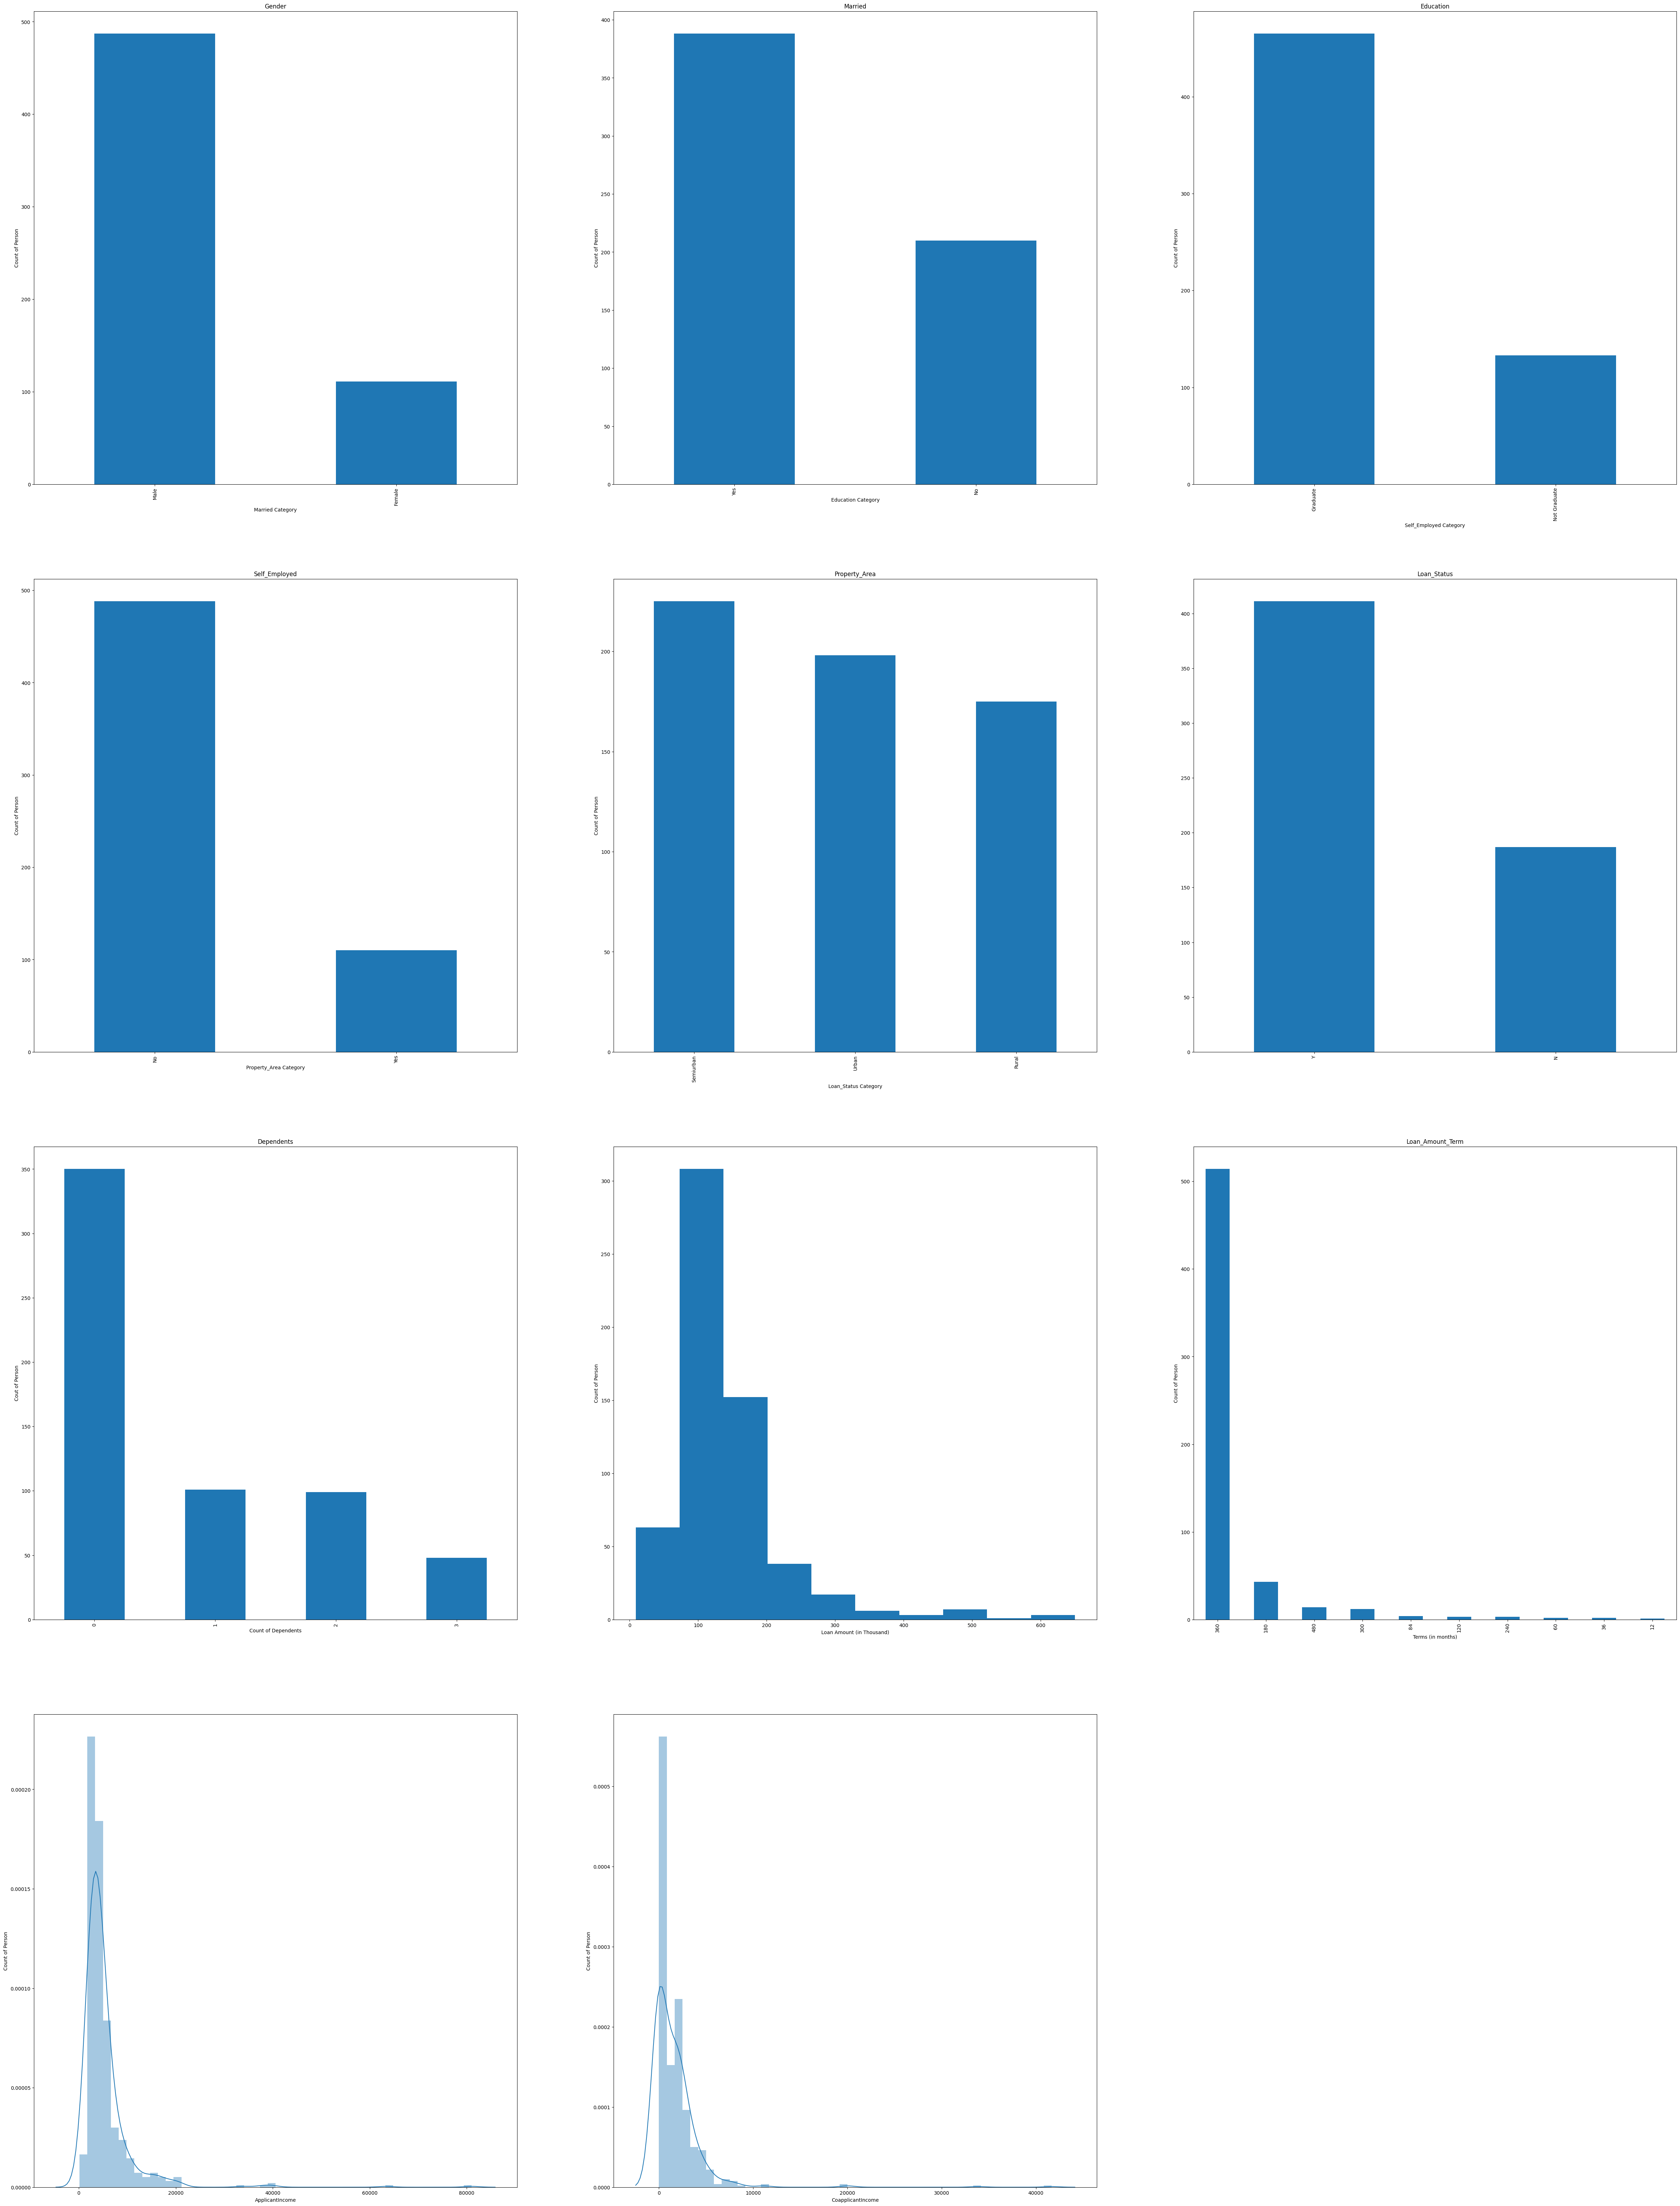

In [40]:
#
object_list = (data.dtypes=='object')
object_list = (object_list[object_list].index.values)
plt.figure(figsize=(60,80))
for i in range(int(len(object_list))):
  plt.ylabel('Count of Person')
  plt.xlabel(f'{object_list[i]} Category')
  ax = plt.subplot(4,3,i+1)
  data[object_list[i]].value_counts().plot.bar(title=object_list[i])
plt.subplot(4,3,7)
plt.xlabel('Count of Dependents')
plt.ylabel('Cout of Person')
data['Dependents'].value_counts().plot.bar(title='Dependents')
plt.subplot(4,3,8)
plt.xlabel('Loan Amount (in Thousand)')
plt.ylabel('Count of Person')
plt.hist(data['LoanAmount'],label ='Loan Amount (in thousands)')
plt.subplot(4,3,9)
plt.xlabel('Terms (in months)')
plt.ylabel('Count of Person')
data['Loan_Amount_Term'].value_counts().plot.bar(title='Loan_Amount_Term')
plt.subplot(4,3,10)
plt.xlabel('Applicant income Amount')
plt.ylabel('Count of Person')
sns.distplot(data['ApplicantIncome']) # The function distplot will be removed in future so use seaborn version below 0.14.0
plt.subplot(4,3,11)
plt.xlabel('Coapplicant income Amount')
plt.ylabel('Count of Person')
sns.distplot(data['CoapplicantIncome'])# The function distplot will be removed in future so use seaborn version below 0.14.0
plt.show();

### data v/s target Variable data visualization

<Figure size 2000x1000 with 0 Axes>

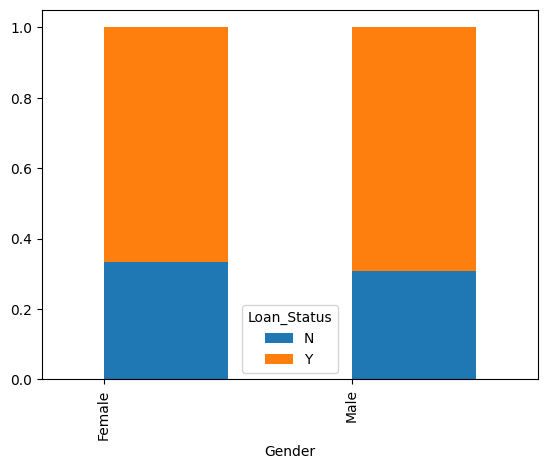

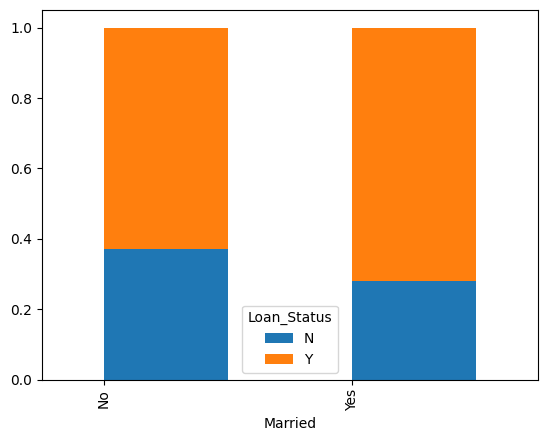

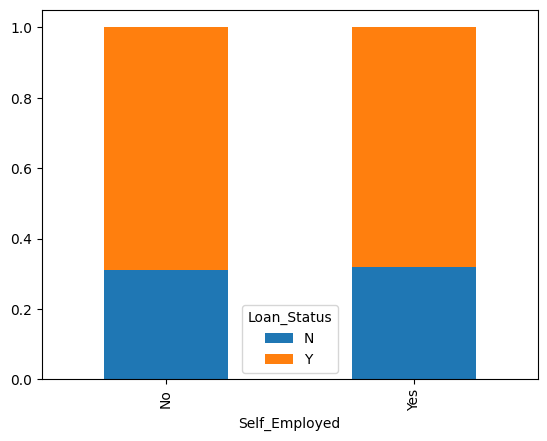

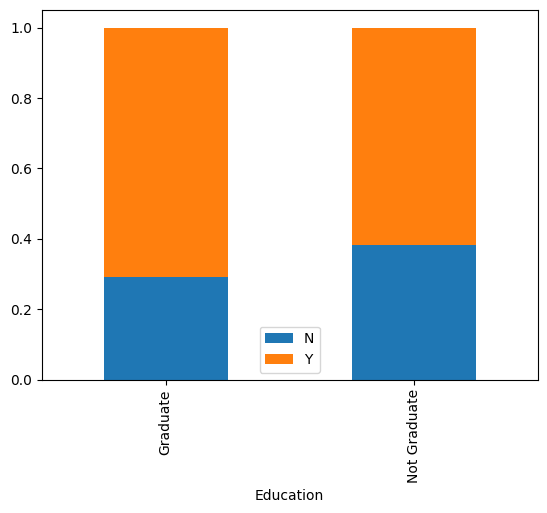

In [41]:
%matplotlib inline
plt.figure(figsize=(20,10))
gender = pd.crosstab(data['Gender'],data['Loan_Status'])
gender.div(gender.sum(1).astype(int),axis=0).plot.bar(stacked=True,align='edge')

married = pd.crosstab(data['Married'],data['Loan_Status'])
married.div(married.sum(1).astype(int),axis=0).plot.bar(stacked=True ,align='edge')

Self = pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self.div(Self.sum(1).astype(int),axis=0).plot.bar(stacked=True)

Education = pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(int),axis=0).plot.bar(stacked=True)
plt.legend()
plt.show()


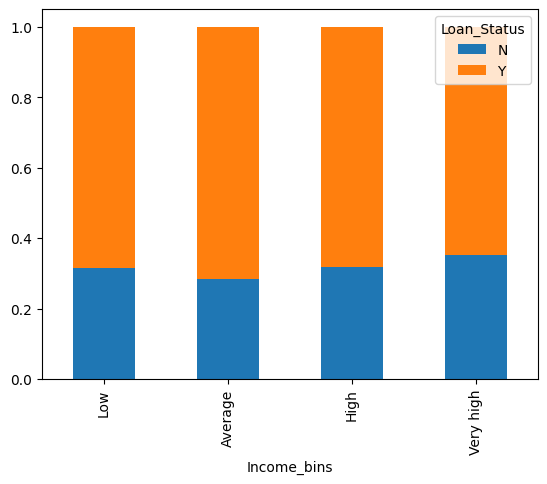

In [42]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
data['Income_bins']=pd.cut(data['ApplicantIncome'],bins,labels=group)
income_bin = pd.crosstab(data['Income_bins'],data['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

data=data.drop('Income_bins',1)

<Axes: >

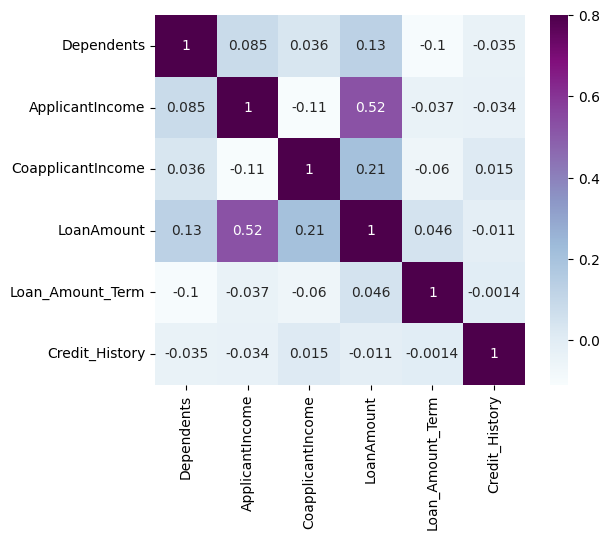

In [43]:
matrix = data.corr()
sns.heatmap(matrix,vmax=0.8,cmap='BuPu',square=True,annot=True)

In [44]:
data['Gender']=data.Gender.apply(lambda x:1 if x=='Male' else 0 )
data['Education'] = data.Education.apply(lambda x:0 if x=='Graduate' else 1)
data['Married'] = data.Education.apply(lambda x:0 if x=='Yes' else 1)
data['Self_Employed'] = data.Education.apply(lambda x:0 if x=='Yes' else 1)
Prop_area = {'Urban':0,'Semiurban':1,'Rural':2}
data['Property_Area'] = data['Property_Area'].map(Prop_area)
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0,127,360,1,0,Y
1,1,1,1,0,1,4583,1508,128,360,1,2,N
2,1,1,0,0,1,3000,0,66,360,1,0,Y
3,1,1,0,1,1,2583,2358,120,360,1,0,Y
4,1,1,0,0,1,6000,0,141,360,1,0,Y
5,1,1,2,0,1,5417,4196,267,360,1,0,Y
6,1,1,0,1,1,2333,1516,95,360,1,0,Y
7,1,1,3,0,1,3036,2504,158,360,0,1,N
8,1,1,2,0,1,4006,1526,168,360,1,0,Y
9,1,1,1,0,1,12841,10968,349,360,1,1,N


In [27]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,598.000000,598.0,598.000000,598.000000,598.0,...,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.814381,1.0,0.740803,0.222408,1.0,...,1631.498328,144.337793,342.341137,0.856187,0.961538
std,0.389124,0.0,1.003198,0.416212,0.0,...,2953.316188,81.303985,64.494977,0.351193,0.789499
min,0.000000,1.0,0.000000,0.000000,1.0,...,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,1.0,0.000000,0.000000,1.0,...,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.0,0.000000,0.000000,1.0,...,1211.500000,127.000000,360.000000,1.000000,1.000000
75%,1.000000,1.0,1.000000,0.000000,1.0,...,2324.000000,163.500000,360.000000,1.000000,2.000000
max,1.000000,1.0,3.000000,1.000000,1.0,...,41667.000000,650.000000,480.000000,1.000000,2.000000


## Train test split for the model

In [ ]:
X=data.drop('Loan_Status',1)
y=data.Loan_Status.apply(lambda x:0 if x=='Y' else 1) # Can use pd.get_dummies to reduce code

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
108,1,1,0.0,0,1,5316.0,0.0,136.0,360.0,1.0,0
272,1,1,0.0,0,1,14583.0,0.0,436.0,360.0,1.0,1
597,0,1,0.0,0,1,4583.0,0.0,133.0,360.0,0.0,1
478,1,1,0.0,1,1,2699.0,2785.0,96.0,360.0,1.0,1
596,1,1,2.0,0,1,7583.0,0.0,187.0,360.0,1.0,0


## Creating a test Models to identify loss ,accuracy etc.

In [ ]:
#Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
RM = RandomForestRegressor()
LR = LinearRegression()
DT= DecisionTreeRegressor()
LG = LogisticRegression()
RM.fit(X_train, y_train) # Random Forest training
LR.fit(X_train, y_train) # Linear Regg training
DT.fit(X_train, y_train) # Decision Tree Training
LG.fit(X_train, y_train) # Log Regg Training

LogisticRegression()

In [ ]:
# Testing the Models
import numpy as np
from sklearn.metrics import r2_score , accuracy_score , log_loss ,confusion_matrix,ConfusionMatrixDisplay
RM_pred = RM.predict(X_test)
LG_pred = LG.predict(X_test)
LR_pred= LR.predict(X_test)
DT_pred = DT.predict(X_test)
models_scores = {"Linear":accuracy_score(y_test,LR_pred.astype(np.int32)),
"Random":accuracy_score(y_test,RM_pred.astype(np.int32)),
 "Logistic":accuracy_score(y_test,LG_pred.astype(np.int32)),
"Decision ":accuracy_score(y_test,DT_pred.astype(np.int32))}

In [ ]:
models_scores

{'Linear': 0.7055555555555556,
 'Random': 0.75,
 'Logistic': 0.7944444444444444,
 'Decision ': 0.7222222222222222}

In [ ]:
# Linear regression Confusion matrix
confusion_matrix(y_test,LR_pred.astype(np.int32))

array([[123,   1],
       [ 52,   4]])

In [ ]:
# Logistic Regression Confusion Matrix
confusion_matrix(y_test,LG_pred.astype(np.int32))

array([[121,   3],
       [ 34,  22]])

In [ ]:
confusion_matrix(y_test,RM_pred.astype(np.int32))

array([[123,   1],
       [ 44,  12]])

In [ ]:
confusion_matrix(y_test,DT_pred.astype(np.int32))

array([[95, 29],
       [21, 35]])

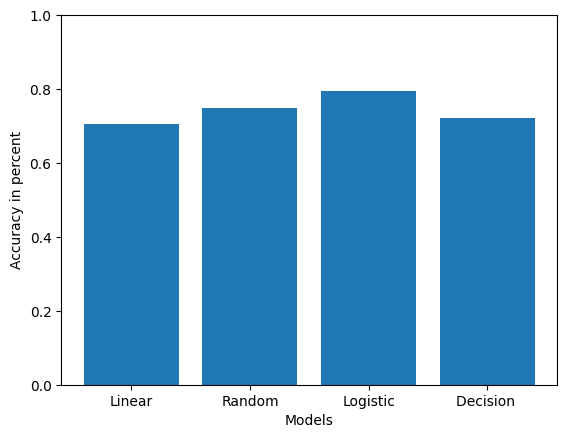

In [ ]:
%matplotlib inline
plt.xlabel('Models')
plt.ylabel('Accuracy in percent')
plt.ylim(top=1)
plt.bar(range(len(models_scores)), models_scores.values(), tick_label=list(models_scores.keys()))
plt.show()

### Using Logistic Regression few Non Default paratmeter to Optimize the accuracy

In [ ]:
# Parameter Efficient Training By GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,5,10,20,25,30,40,50],'max_iter':[100,150,200]}
Eff_log_reg=GridSearchCV(estimator=LG,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
Log_Model = Eff_log_reg.fit(X_train,y_train)

In [ ]:
print(Eff_log_reg.best_params_)


{'C': 30, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(Eff_log_reg.best_score_)

0.8135111876075731


In [ ]:
# Parameter Efficient Training By LogisticRegessionCV
from sklearn.linear_model import LogisticRegressionCV
LGCV = LogisticRegressionCV(solver='liblinear',cv=5)
LGCV.fit(X_train,y_train)
LGCV.bes

LogisticRegressionCV(cv=5, solver='liblinear')